# Testing Reddit Scraping and Setiment Analysis on Reddit Headlines:

## Testing Reddit Scraping with PRAW

### Setup:

#### Set up virtual env:
- Navigate to the right folder, then create a virtual env:

` virtualenv -p python3 env `
` source env/bin/activate `
(now all python commands/packages are in the virtual environment)

(Note: if openning a new terminal, you just have to do the `source env/bin/activate` step)
- Install praw in the terminal:

`pip install praw`

Then here we install it: `import praw`

(using this with https://towardsdatascience.com/scraping-reddit-data-1c0af3040768)




In [1]:
# Scraping data from Stadia Subreddit (using https://towardsdatascience.com/scraping-reddit-data-1c0af3040768)

import praw


To create a praw instance, I use the following id:

- NAME (user_agent): Reddit_Stadia_praw
- personal use script (client_id): -------
- Secret: -----------

`reddit = praw.Reddit(client_id='my_client_id', client_secret='my_client_secret', user_agent='my_user_agent')`

In [23]:
`reddit = praw.Reddit(client_id='my_client_id', client_secret='my_client_secret', user_agent='my_user_agent')`

SyntaxError: invalid syntax (<ipython-input-23-e3b30f905964>, line 1)

## Examples of scraping data with praw:

### Headlines:

In [3]:
# test:
# get 10 hot posts from the Stadia subreddit
hot_posts = reddit.subreddit('Stadia').hot(limit=10)
for post in hot_posts:
    print(post.title)

The Stadia Team presents “I Made This” -- A Play it Forward Community Event
Stadia Community UpDaTe - December 13
Let's give Google a breather
Darksiders Genesis - Patch #1
Early Christmas gift today from BF. Founder's Edition! So stoked!
[Mock-up] Captures should be shown on your user profile with the ability to rate, share and post on social media, similar to OnLive.
Meanwhile, most Stadia players are fine...
This sub is turning into toxic garbage..
Seriously, why the panic mode??
TIL that when the PS4 is "copying update file.." what it's actually doing, is copying the whole game and adds the patch in the process. So say I'm installing an update for RDR2, it copies 110gb every time, even if the update is a few hundreds mb. So thank you Stadia for saving me time.


In [4]:
import pandas as pd
posts = []
ml_subreddit = reddit.subreddit('MachineLearning')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts)
print(posts.iloc[2,6], '\n', "Source url:", posts.iloc[2,4])

                                               title  score      id  \
0  [D] Machine Learning - WAYR (What Are You Read...     21  e4nmyk   
1  [D] What was your favorite paper of 2019 and why?    114  e8the3   
2  [D] NeurIPS 2019 Bengio Schmidhuber Meta-Learn...    366  ea2gap   
3  [R] OpenAI releases paper on OpenAI Five: Dota...     25  ea880b   
4  [P] I Implemented The Improved StyleGAN (Style...     19  ea71tg   
5  [R] Improving predictive CLV by using non-tran...      8  ea6smr   
6             [R] Deep Structured Implicit Functions      3  ea915v   
7  [D] What do you think were the most important ...    163  e9rwj9   
8  [Discussion] My boss is convinced you can do a...    114  e9taa3   
9  [P] Thinking about RL or a Genetic Algorithm f...      2  ea7axo   

         subreddit                                                url  \
0  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
1  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   

In [5]:
# Getting info about the subreddit:
ml_subreddit = reddit.subreddit('MachineLearning')

print(ml_subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

### Comments from a thread:

In [6]:
submission = reddit.submission(url="https://www.reddit.com/r/Stadia/comments/e9s9sk/literally_every_time_d/")
# or submission = reddit.submission(id="a3p0uq")

# Print top level comments:
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    print(top_level_comment.body)

Critics: Stadia doesn't work!

Me: Plays RDR2 without a single hiccup for 3 hours straight on a mediocre connection
I hope they dont remove this.

I would like this place to meme once in a while, have an upvote.
Someone on this sub yesterday told me that the Stadia graphics were "not playable". People are fucking idiots.
My turn for a covert story:

Last week I told my nephew I bought Stadia and he rolled his eyes. He said he was a "proper gamer" and lag was in issue why he would never support Stadia. Well this morning he came over before I went to work and I turned on Destiny 2. He was quite surprised how fast it loaded ("well that is nice"). Then I handed him the controller and after a cpl minutes playing he commented that there was no lag (playing on wifi not hardwired). He was also impressed how quick it was to jump to different destinations. I'm not going to say he is a fan now but he is convinced the service works and his biggest complaint is really a non-issue. I wonder how many

In [7]:
subreddit = reddit.subreddit('Stadia')
top_subreddit = subreddit.top()
for submission in subreddit.top(limit=20):
    print(submission.title, 'ID number:', submission.id, "Date created:", submission.created)

Google used the "First come, first serve unique Stadia name" to lure in buyers that were on the fence. They simply lied, just like they lied or at least mislead us about the quality of the service. What can we do to return the favor to Google? ID number: dynp2a Date created: 1574213866.0
Hi, I'm Andrey Doronichev and I’m the Director of Product for Stadia here at Google! AMA ID number: ceuy4w Date created: 1563497158.0
Love Phil, but hows this even possible? PS3, Xbox One and now Stadia 😧 ID number: dz3lvq Date created: 1574292685.0
This sub the past week ID number: dzx29w Date created: 1574432535.0
Hi Reddit! Andrey from the Stadia team here and I'm back for another round of questions. Only this time, I'm bringing some friends along to help answer anything you may have before launch. ID number: dvv3tv Date created: 1573695177.0
People love to complain ID number: e0pw0v Date created: 1574579646.0
Yep, definitely ID number: e9cf4t Date created: 1576123985.0
A terrible lie. ID number: dy

## Testing Reddit Headline Sentiment Analysis
### (using a pre-trained model)

Following the walk-through from this notebook: https://github.com/dend/data-explorations/blob/master/notebooks/sentiment-analysis-reddit.ipynb, as well as drawing from original source for said notebook: https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

In [8]:
import urllib.request
import json 
import datetime

# Import pandas as pd (pandas was imported with the praw example)
# Installation details for nltk here: http://www.nltk.org/install.html
# pip install seaborn
# pip intall matplotlib
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pprint import pprint
from IPython import display

In [9]:
# We use Valence Aware Dictionary and Sentiment Reasoner as a pre-trained model
nltk.download('vader_lexicon')
# Graphing library for seaborn:
seaborn.set(style='darkgrid', context='talk', palette='Dark2')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Izzy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
def load_results(lower_bound_timestamp, upper_bound_timestamp, target_result_size, target_subreddit, score_threshold):
    headline_collection = set()
    
    reddit_data_url = f"https://api.pushshift.io/reddit/submission/search/?after={lower_bound_timestamp}&before={upper_bound_timestamp}&sort_type=score&sort=desc&subreddit={target_subreddit}&size={target_result_size}&score={score_threshold}"
    
    try:
        with urllib.request.urlopen(reddit_data_url) as url:
            data = json.loads(url.read().decode())
            
            for submission in data['data']:
                headline_collection.add(submission['title'])

        return headline_collection
    except urllib.error.HTTPError as e:
        print(e.__dict__)
        return set()
    except urllib.error.URLError as e:
        print(e.__dict__)
        return set()

In [11]:
headlines = set()

time_now = datetime.datetime.now()

limit_delta = 365
limit_lower_delta = 360

subreddit = "Stadia"
result_size = 1000
score_limit = ">10"

for i in range(0, 73):
    previous_timestamp = int((time_now - datetime.timedelta(days=limit_delta)).timestamp())
    current_timestamp = int((time_now - datetime.timedelta(days=limit_lower_delta)).timestamp())

    full_collection = load_results(previous_timestamp, current_timestamp, result_size, subreddit, score_limit)
    headlines = headlines.union(full_collection)
    
    limit_delta = limit_delta - 5
    limit_lower_delta = limit_lower_delta - 5
    
    display.clear_output()
    print(f"Cycle {i}")
    print(len(headlines))

Cycle 72
1389


In [12]:
sia = SentimentIntensityAnalyzer()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:5], width=100)

[{'compound': 0.0,
  'headline': 'Can Google actually deliver 4k 60fps',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4005, 'headline': 'So excited', 'neg': 0.0, 'neu': 0.271, 'pos': 0.729},
 {'compound': 0.0,
  'headline': 'Wired magazine UK Google Stadia',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Stadia Swag with the Founders Edition',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4588,
  'headline': 'october the 15th is today, stay tuned :)',
  'neg': 0.0,
  'neu': 0.7,
  'pos': 0.3}]


In [13]:
df = pd.DataFrame.from_records(results)
df.head()

neg    neu    pos  compound                                  headline
0  0.0  1.000  0.000    0.0000      Can Google actually deliver 4k 60fps
1  0.0  0.271  0.729    0.4005                                So excited
2  0.0  1.000  0.000    0.0000           Wired magazine UK Google Stadia
3  0.0  1.000  0.000    0.0000     Stadia Swag with the Founders Edition
4  0.0  0.700  0.300    0.4588  october the 15th is today, stay tuned :)

In [14]:
# Based on the compound assessed value, we can determine whether the headline 
# that we are analyzing is positive or negative. 
# We can label that accordingly with a 1 value for positive sentiment and -1 value for negative sentiment.
df['label'] = 0
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1
df.head()

neg    neu    pos  compound                                  headline  \
0  0.0  1.000  0.000    0.0000      Can Google actually deliver 4k 60fps   
1  0.0  0.271  0.729    0.4005                                So excited   
2  0.0  1.000  0.000    0.0000           Wired magazine UK Google Stadia   
3  0.0  1.000  0.000    0.0000     Stadia Swag with the Founders Edition   
4  0.0  0.700  0.300    0.4588  october the 15th is today, stay tuned :)   

   label  
0      0  
1      1  
2      0  
3      0  
4      1

In [15]:
# Isolate the headlines and labels into a separate data frame, 
# and store the data in a CSV file that we can work with later on 
working_dataframe = df[['headline', 'label']]
working_dataframe.to_csv('labeled-data-set.csv', mode='a', encoding='utf-8', index=False)

In [16]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:20], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:20], width=200)

Positive headlines:

['So excited',
 'october the 15th is today, stay tuned :)',
 'One benefit of Stadia: Developers can make games of unlimited size',
 'Just landed on my doorstep. EDGE UK magazine with a big Stadia feature. The roll out is definitely rolling....',
 'Yet another positive review!',
 'Is the Stadia Pro subscription very much like PS+ from Sony?',
 'Will a reduced chance of piracy entice more developers and publishers to support Stadia?',
 'What would be the best lunch surprise for you?',
 'The new Microsoft Flight Simulator gives me great hope',
 'So happy this wasn’t taken yet! I’m sorry if I took someone else’s idea',
 'Hopefully Stadia just adds new games to the pro subscription library without you having to "buy" them like PS Plus. I never forget, but you shouldn\'t have to do it manually.',
 'Play Store Credit',
 'Ready for Stadia! Has anyone else upgraded their internet?',
 'Microsoft flight simulator 2020! Would be great on Stadia',
 '&lt;Insert Easily Googled Qu

In [17]:
# Add context specific stopwords:
stadia_sw = {'Google', 'Stadia', 'Google Stadia','game', 'gaming','will'}
context_sw = stadia_sw.union(STOPWORDS)
for word in context_sw:
    print(word)

theirs
ourselves
therefore
game
while
cannot
which
against
off
can't
ever
hers
mustn't
again
they'll
would
her
our
only
don't
between
wouldn't
it's
down
if
like
most
both
nor
then
they'd
who's
has
ours
why's
than
you've
so
yours
further
after
hence
its
shouldn't
until
otherwise
hasn't
aren't
just
himself
such
a
however
him
because
k
does
you'll
were
won't
during
could
hadn't
his
we're
weren't
own
do
was
myself
get
she'd
he's
am
will
it
can
of
you're
they've
ought
itself
here
should
having
some
for
their
very
she'll
same
but
no
he'd
here's
before
about
didn't
shan't
yourselves
when
else
my
at
into
me
are
com
isn't
out
have
shall
few
also
she
we'll
in
there
www
doesn't
did
r
when's
let's
not
gaming
Google
that
to
we'd
with
or
too
we've
them
i
why
had
being
doing
you'd
couldn't
any
through
above
he'll
been
yourself
they're
the
Google Stadia
more
your
be
below
on
Stadia
that's
i'd
those
you
http
there's
these
over
other
as
by
is
they
an
once
this
each
i'll
all
up
herself
how's
we
what
have

In [18]:
# We generate a word cloud for both the negative and the positive headlines, 
# to see if there are any frequently-occurring words. 
# To do that, we will isolate the dataframe columns.
negative_titles = df[df['label'] == -1]
negative_titles.head()

neg    neu    pos  compound  \
19  0.390  0.610  0.000   -0.4939   
23  0.271  0.729  0.000   -0.3818   
24  0.272  0.665  0.063   -0.7650   
31  0.189  0.811  0.000   -0.2732   
41  0.322  0.678  0.000   -0.2263   

                                             headline  label  
19       Grief: The 5 Stages of Hardware Dissociation     -1  
23            Do you think Apple will put up a fight?     -1  
24  I’m sick of seeing YouTubers talk crap about S...     -1  
31  Google Stadia hands-on: I'm in disbelief at th...     -1  
41             Character Creators Were Limited Before     -1

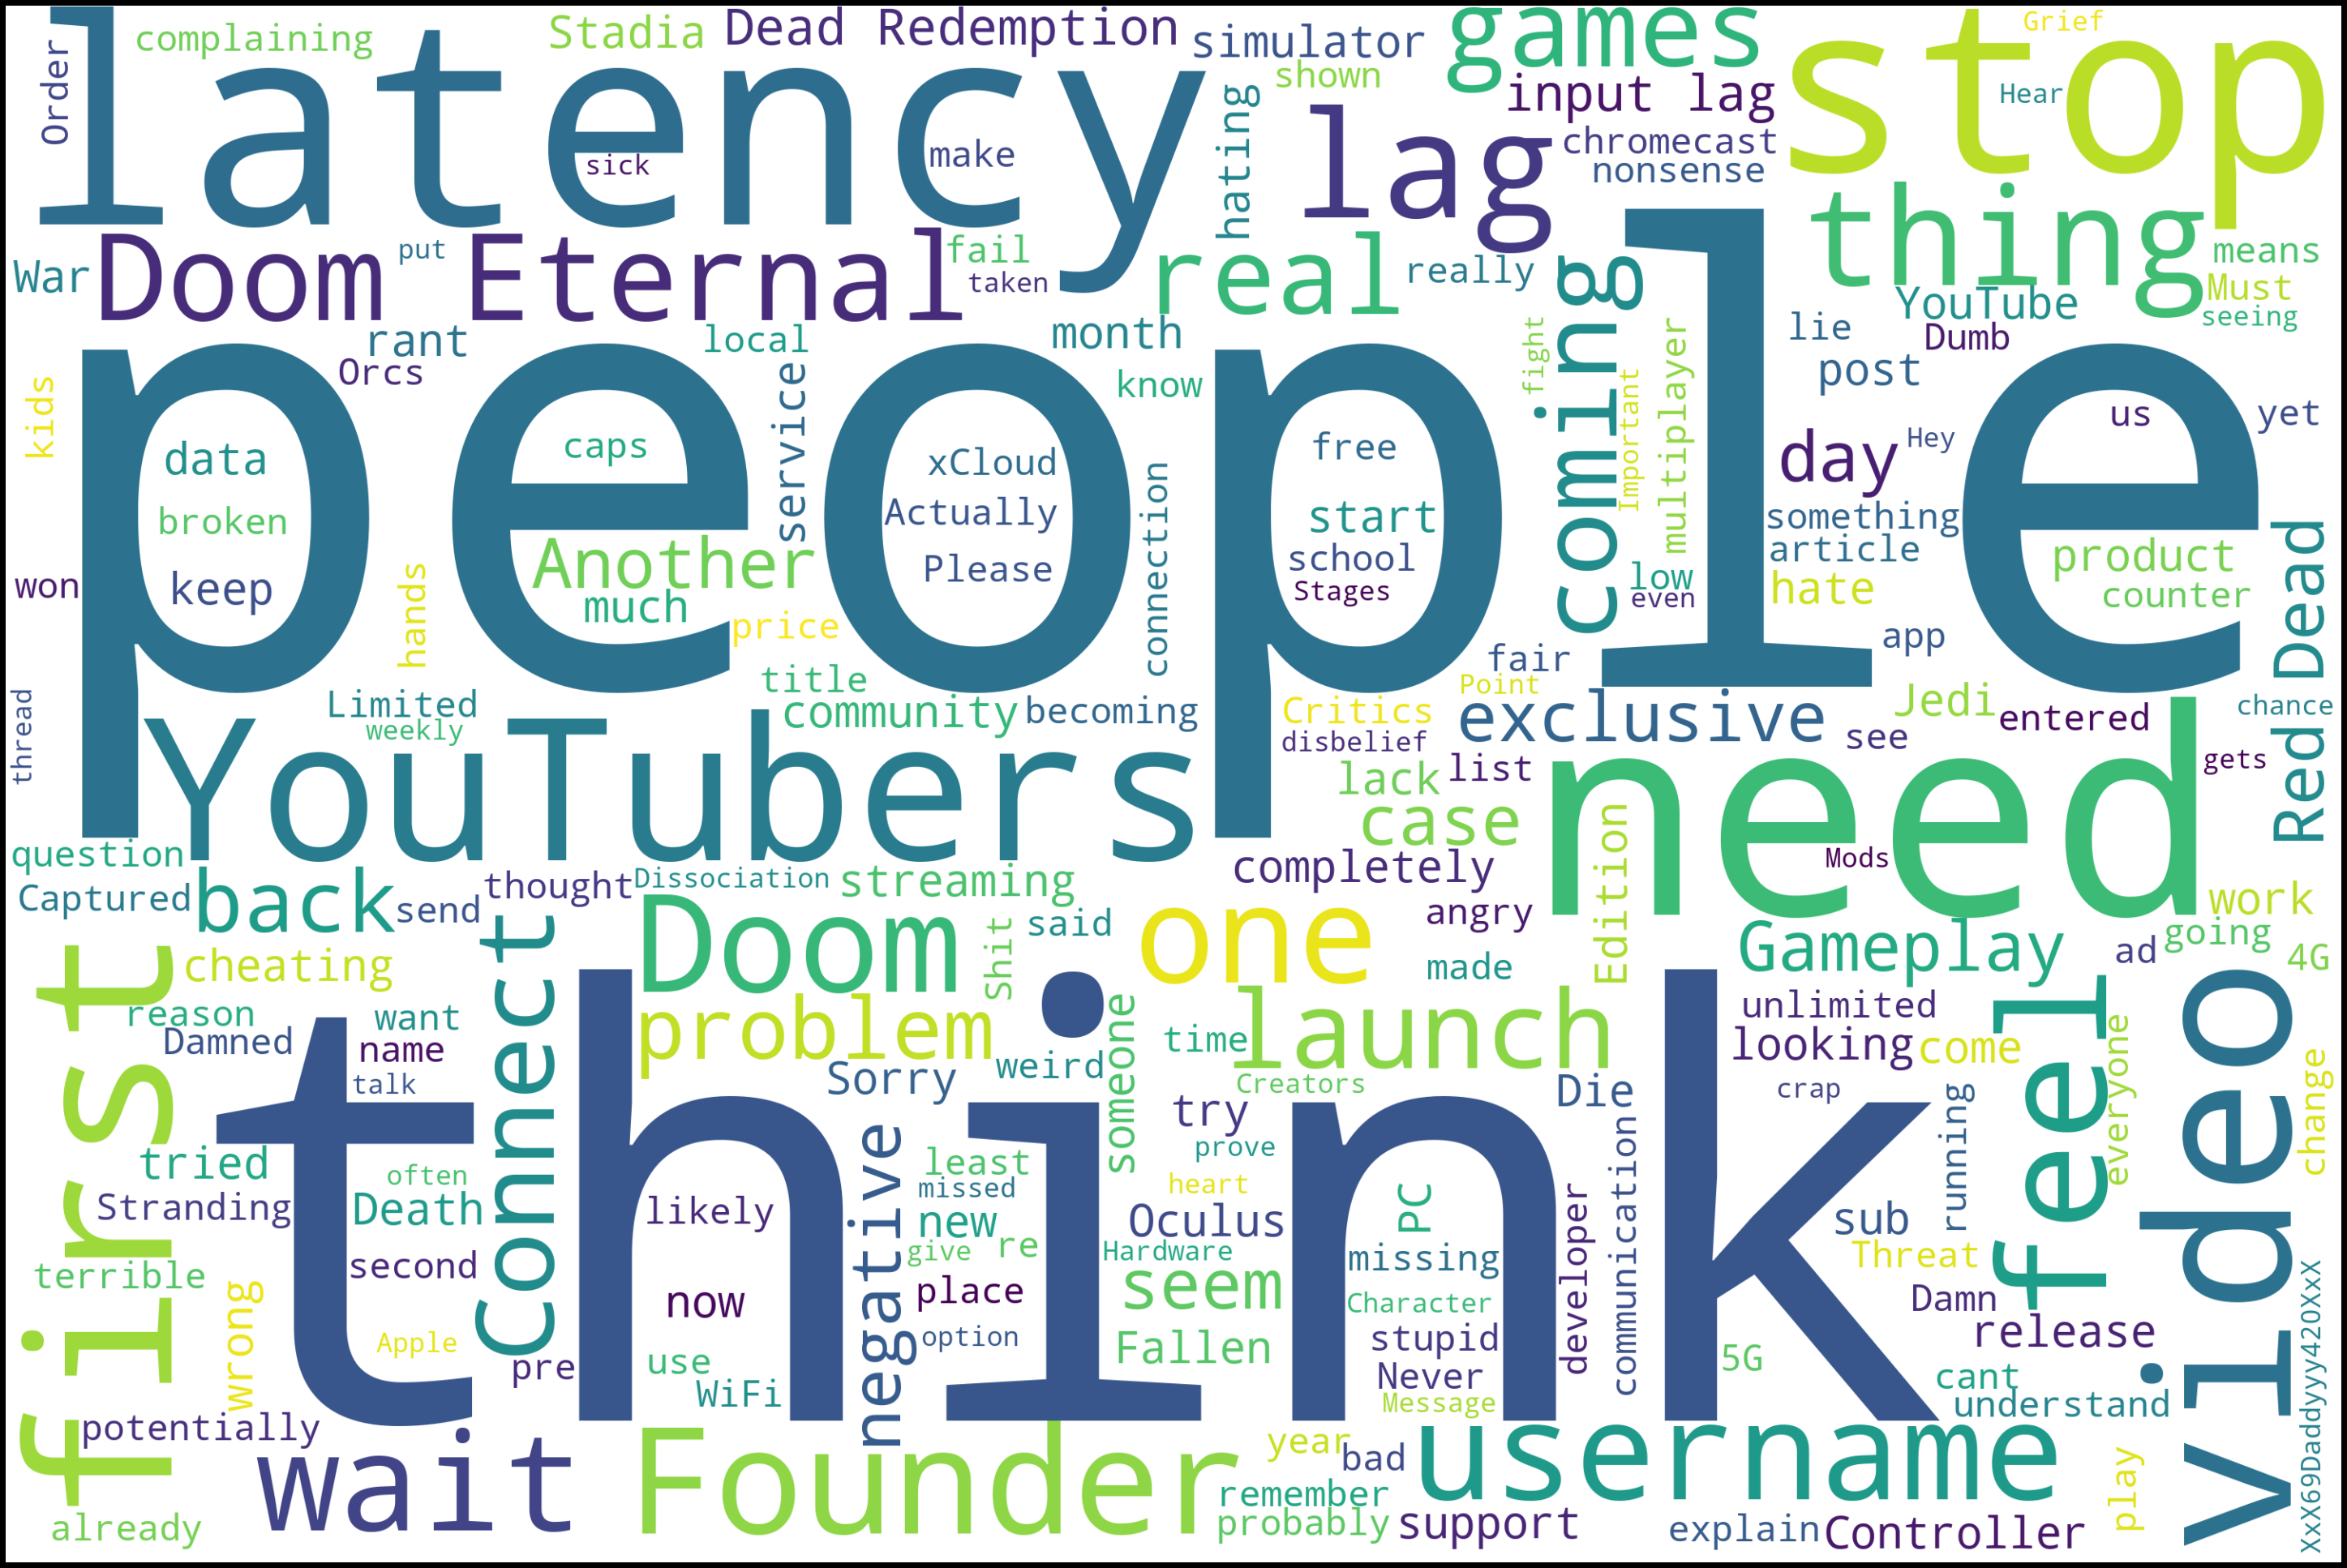

In [19]:
# Negative word cloud:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = context_sw).generate(' '.join(negative_titles['headline']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
# Same, but for positive titles
positive_titles = df[df['label'] == 1]
positive_titles.head()

neg    neu    pos  compound  \
1  0.0  0.271  0.729    0.4005   
4  0.0  0.700  0.300    0.4588   
5  0.0  0.769  0.231    0.4588   
8  0.0  0.863  0.137    0.4019   
9  0.0  0.435  0.565    0.5983   

                                            headline  label  
1                                         So excited      1  
4           october the 15th is today, stay tuned :)      1  
5  One benefit of Stadia: Developers can make gam...      1  
8  Just landed on my doorstep. EDGE UK magazine w...      1  
9                       Yet another positive review!      1

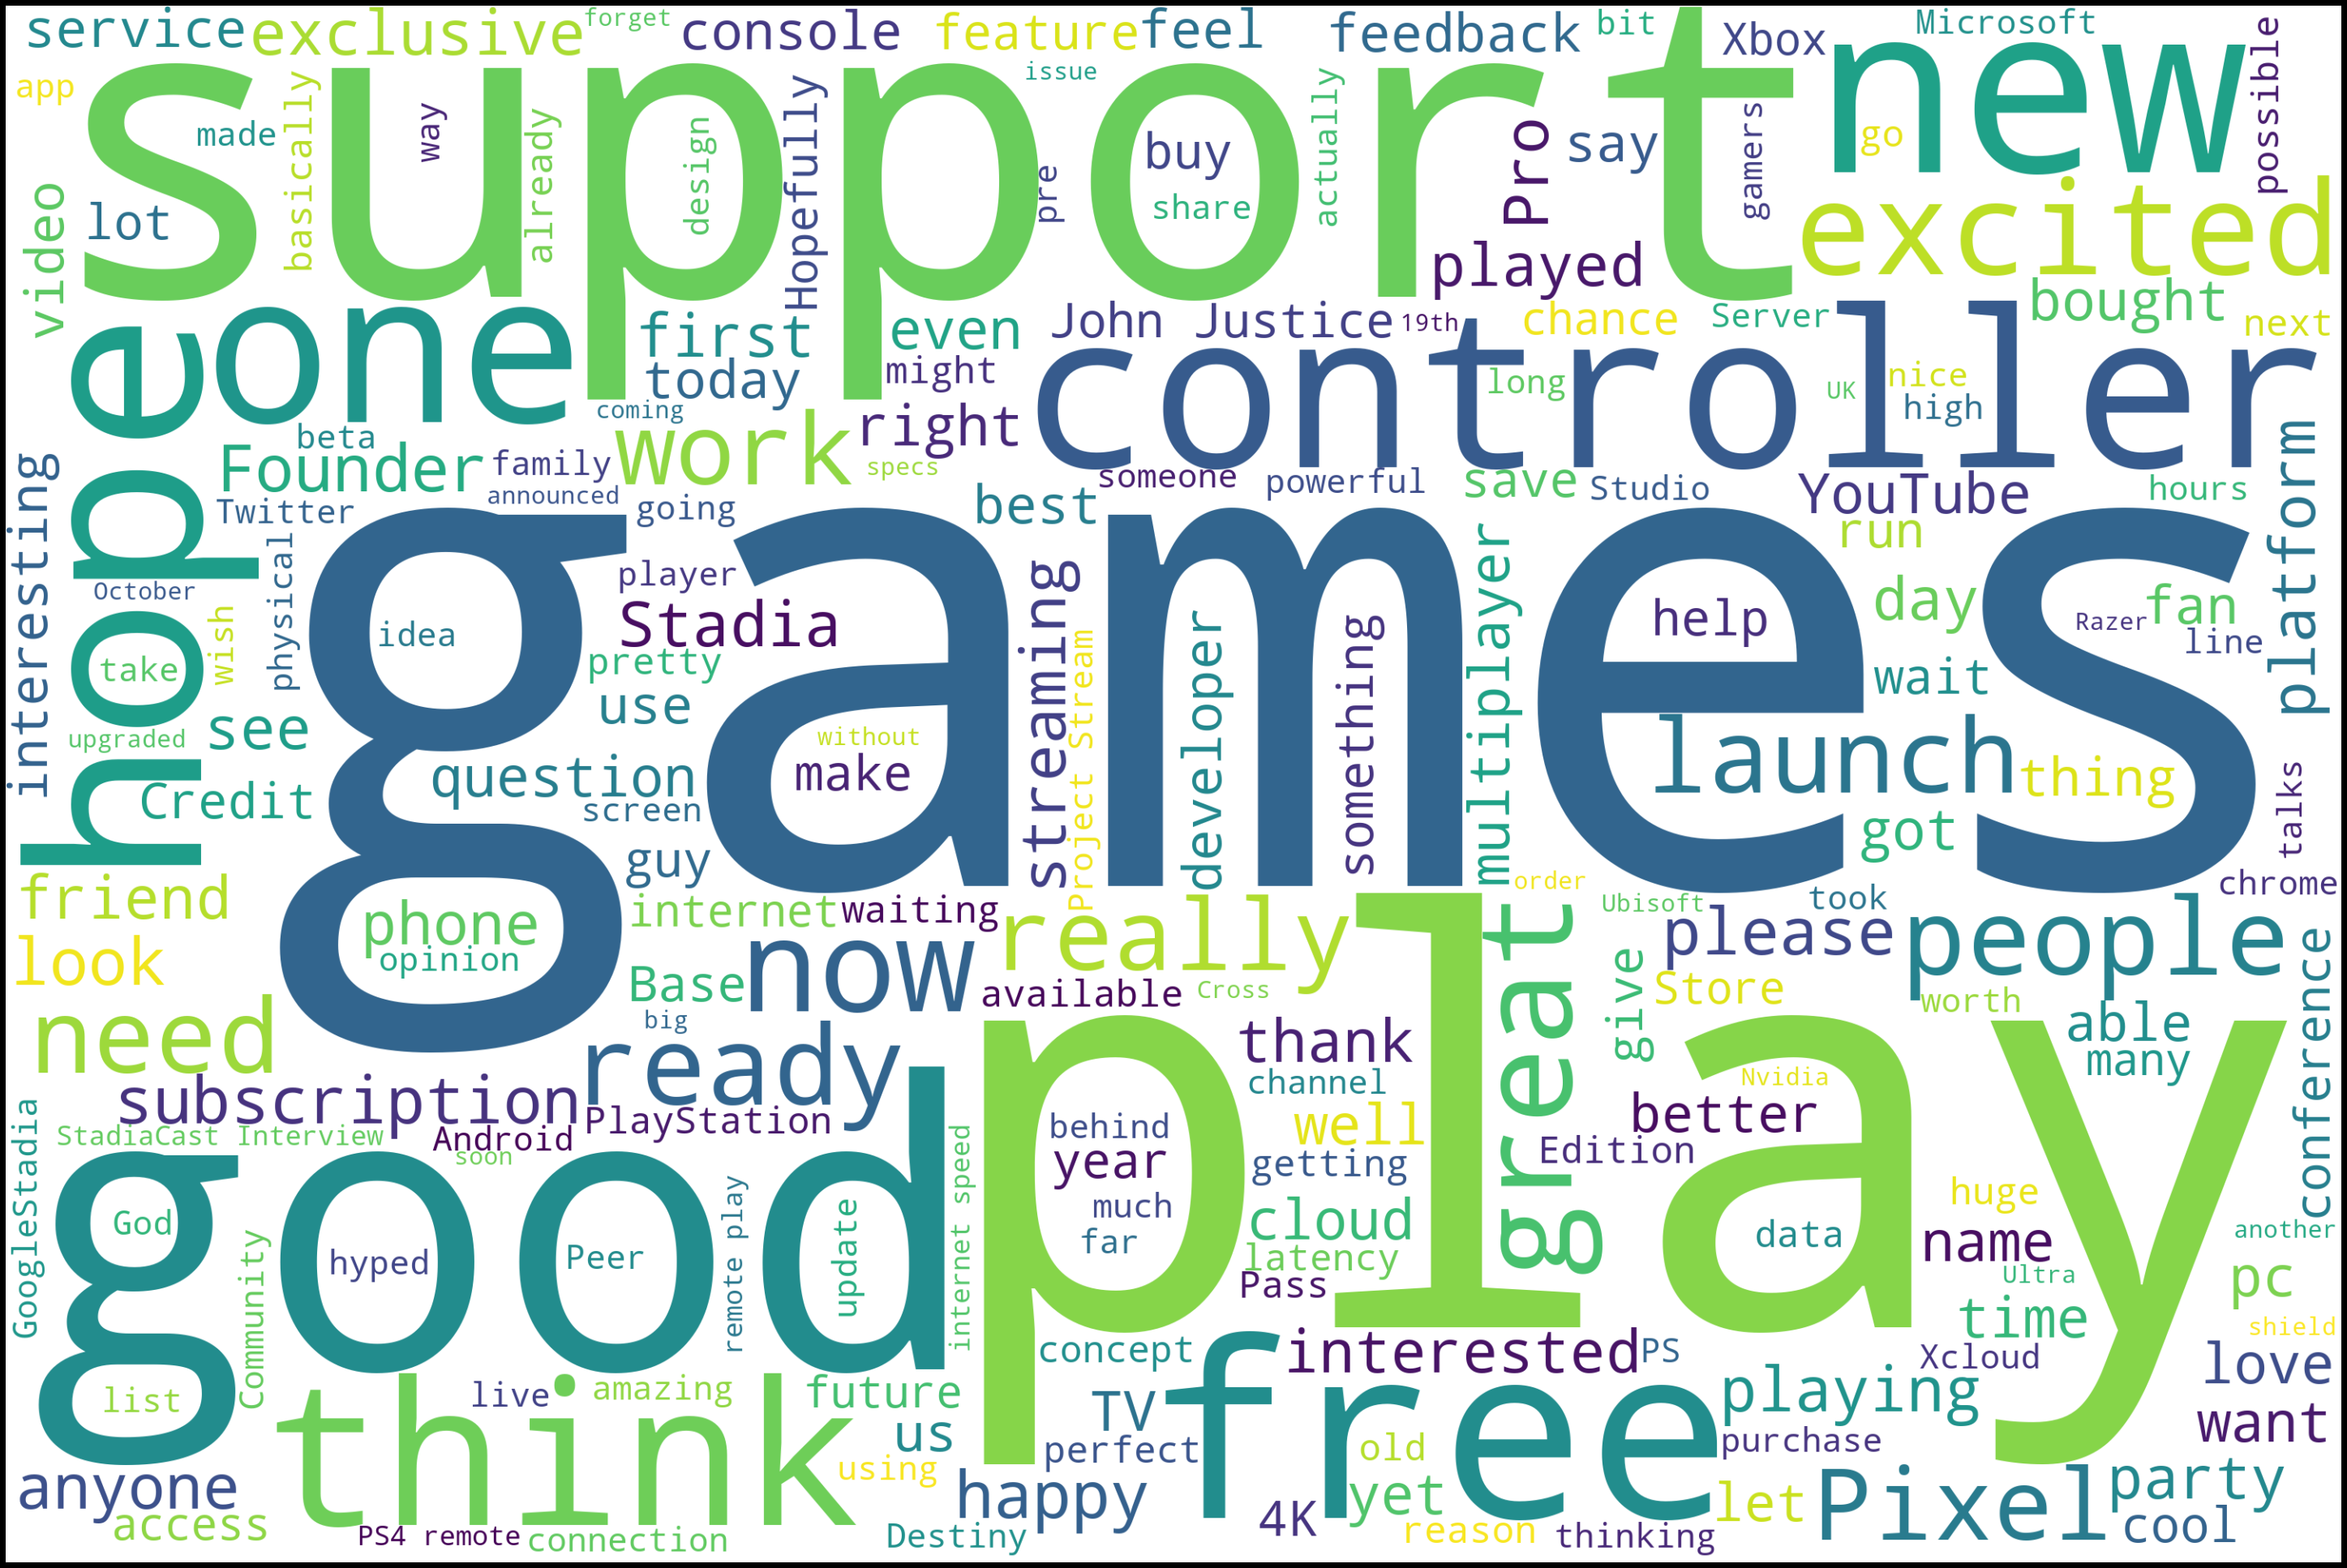

In [21]:
# Positive word cloud:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = context_sw).generate(' '.join(positive_titles['headline']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

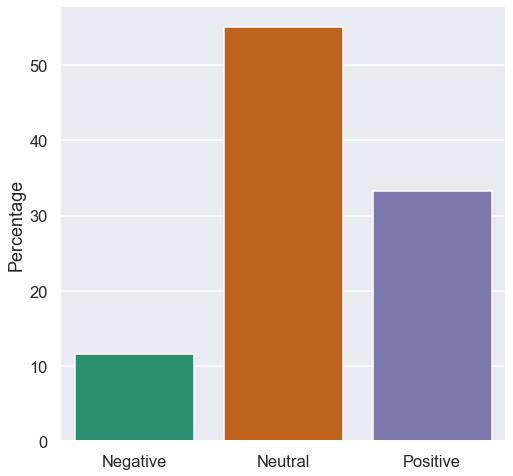

In [22]:
# Comparing the number of positive/neutral/negative

fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

seaborn.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

# Re-do sentiment analysis replacing video game names with strings

Unfortunately, looking at the way the pre-made model labels some of the reddit thread titles, we can see that it mislabels some of the names of video games (Doom, Eternal, Dead) as negative (e.g. "Red dead redemption!" is incorrectly labelled as negative.)

In order to address this, we can replace the names of video games with strings (so that 'dead', 'doom', etc. aren't associated with negative sentiment scores).

In [92]:
# Here is a list of all the game titles released and announced by Google for Stadia as of mid-Dec, 2019:

games = ['Assassin\'s Creed Odyssey',
'Attack on Titan: Final Battle 2',
'Destiny 2: The Collection',
'Farming Simulator 2019',
'Final Fantasy XV',
'Football Manager 2020',
'Grid 2019',
'Gylt',
'Just Dance 2020',
'Kine',
'Metro Exodus',
'Mortal Kombat 11',
'NBA 2K20',
'Rage 2',
'Red Dead Redemption 2',
'Rise of the Tomb Raider',
'Samurai Showdown',
'Shadow of the Tomb Raider: Definitive Edition ',
'Thumper',
'Tomb Raider: Definitive Edition',
'Trials Rising',
'Wolfenstein: Youngbloo',
'Borderlands 3',
'Darksiders Genesis',
'Dragonball Xenoverse 2',
'Ghost Recon Breakpoint',
'Cyberpunk 2077',
'Baldur\'s Gate 3',
'Destroy All Humans',
'Doom Eternal',
'Get Packed',
'Elder Scrolls Online',
'Orcs Must Die! 3',
'Marvel\'s Avengers',
'Superhot Mind Control Delete',
'The Division 2',
'The Crew 2',
'Windjammers 2',
'Power Rangers: Battle for the Grid']

# We also add a few variations of the names of games to the lists 
# (but we'll keep them separate for organizational purposes!):

games_variation = ['Assassin\'s Creed', 'Assassin\'s',
'Attack on Titan', 'AoT'
'Destiny 2', 'Destiny'
'Exodus',
'Mortal Kombat', 'Kombat',
'Rage'
'Red Dead 2', 'Red Dead', 'Red Dead Redemption',
'Rise of the Tomb Raider', 'Tomb Raider',
'Showdown', 
'Shadow of the Tomb Raider',
'Tomb Raider: Def Edition',
'Trials',
'Wolfenstein',
'Borderlands',
'Darksiders', 'Dark siders', 'Dark',
'Destroy',
'Doom', 'Eternal'
'Orcs Must Die!', 'Must Die', 'Orcs Must Die',
'Battle for the Grid']

# We create a joint set of games and games_variation that replaces the game names with 'nonesense' strings:
all_games = games_variation + games
replacement_game_names = {}
for game in (all_games):
    replacement_game_names[game.upper()] = ''.join(game.upper().split())[1::2].replace('','0')
print(replacement_game_names)

{"ASSASSIN'S CREED": '0S0A0S0N0S0R0E0', "ASSASSIN'S": '0S0A0S0N0S0', 'ATTACK ON TITAN': '0T0A0K0N0I0A0', 'AOTDESTINY 2': '0O0D0S0I0Y0', 'DESTINYEXODUS': '0E0T0N0E0O0U0', 'MORTAL KOMBAT': '0O0T0L0O0B0T0', 'KOMBAT': '0O0B0T0', 'RAGERED DEAD 2': '0A0E0E0D0A020', 'RED DEAD': '0E0D0A0', 'RED DEAD REDEMPTION': '0E0D0A0R0D0M0T0O0', 'RISE OF THE TOMB RAIDER': '0I0E0F0H0T0M0R0I0E0', 'TOMB RAIDER': '0O0B0A0D0R0', 'SHOWDOWN': '0H0W0O0N0', 'SHADOW OF THE TOMB RAIDER': '0H0D0W0F0H0T0M0R0I0E0', 'TOMB RAIDER: DEF EDITION': '0O0B0A0D0R0D0F0D0T0O0', 'TRIALS': '0R0A0S0', 'WOLFENSTEIN': '0O0F0N0T0I0', 'BORDERLANDS': '0O0D0R0A0D0', 'DARKSIDERS': '0A0K0I0E0S0', 'DARK SIDERS': '0A0K0I0E0S0', 'DARK': '0A0K0', 'DESTROY': '0E0T0O0', 'DOOM': '0O0M0', 'ETERNALORCS MUST DIE!': '0T0R0A0O0C0M0S0D0E0', 'MUST DIE': '0U0T0I0', 'ORCS MUST DIE': '0R0S0U0T0I0', 'BATTLE FOR THE GRID': '0A0T0E0O0T0E0R0D0', "ASSASSIN'S CREED ODYSSEY": '0S0A0S0N0S0R0E0O0Y0S0Y0', 'ATTACK ON TITAN: FINAL BATTLE 2': '0T0A0K0N0I0A0:0I0A0B0T0L020

In [100]:
# We replace game names in headlines with the dictionary replacement_game_names

# Re-do download & sentiment analysis:

temp_headlines = set()

time_now = datetime.datetime.now()

limit_delta = 365
limit_lower_delta = 360

subreddit = "Stadia"
result_size = 1000
score_limit = ">10"

for i in range(0, 73):
    previous_timestamp = int((time_now - datetime.timedelta(days=limit_delta)).timestamp())
    current_timestamp = int((time_now - datetime.timedelta(days=limit_lower_delta)).timestamp())

    full_collection = load_results(previous_timestamp, current_timestamp, result_size, subreddit, score_limit)
    temp_headlines = temp_headlines.union(full_collection)
    
    limit_delta = limit_delta - 5
    limit_lower_delta = limit_lower_delta - 5
    
    display.clear_output()
    print(f"Cycle {i}")
    print(len(temp_headlines))
    

Cycle 72
1627


In [132]:
headlines = set()
for line in temp_headlines:
    replaced  = line.upper()
    for game_name in replacement_game_names:
        replaced = replaced.replace(game_name, replacement_game_names[game_name])
    headlines.add(replaced)
        
for i, val in enumerate(itertools.islice(headlines, 1000)):
    print(i, val)

0 FOR THOSE WHO PLAYED PROJECT STREAM AND GOT A FREE COPY OF AC ODYSSEY, THE SEASON PASS IS ON SALE 50% OFF RIGHT NOW.
1 CAN'T THE MODS PIN A FAQ TO THE FRONT PAGE? THERE SEEMS TO BE SO MANY SIMILAR QUESTIONS.
2 CALLED GOOGLE SUPPORT... I MENTIONED STADIA... THE SUPPORT MEMBER SAID "I'M SORRY WHAT'S THAT?"
3 PLAYSTATION CONFIRMS DESTINY 2 CROSS-SAVE COMING TO STADIA!
4 WOULD BE DOPE IF GOOGLE BUNDLED STADIA WITH GOOGLE FIBER.
5 AN EXCLUSIVE LOOK AT HOW GOOGLE DESIGNED ITS STADIA GAME CONTROLLER
6 THE REAL WAVE OF STADIA ADOPTION WILL COME NEXT YEAR WHEN TVS HAVE IT BUILT IN.
7 GOOGLE STADIA SUPPORT IS TERRIBLE... MY NAME IS STEVEN BUT ACCORDING TO THEM IT'S ELMO LOL.
8 JUST PRE ORDERED STADIA, HOPE THEY BRING IT TO THE IPAD ASAP
9 TO REDUCE LAG STADIAS IS INTRODUCING NEGATIVE LAG
10 NEW STADIA VIDEO FROM GAMESCOM INCLUDING A INTERVIEW WORTH A WATCH
11 THE (DISASTROUS) RDR2 LAUNCH MADE ME PREORDER STADIA NOW!
12 WIRED UK ARTICLE ON STADIA
13 WITCHER 3 HOPES ANYONE?
14 YOU'RE WRONG ABOUT

In [133]:
sia = SentimentIntensityAnalyzer()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:5], width=100)

[{'compound': 0.8001,
  'headline': 'FOR THOSE WHO PLAYED PROJECT STREAM AND GOT A FREE COPY OF AC ODYSSEY, THE SEASON '
              'PASS IS ON SALE 50% OFF RIGHT NOW.',
  'neg': 0.0,
  'neu': 0.746,
  'pos': 0.254},
 {'compound': 0.0,
  'headline': "CAN'T THE MODS PIN A FAQ TO THE FRONT PAGE? THERE SEEMS TO BE SO MANY SIMILAR "
              'QUESTIONS.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.34,
  'headline': 'CALLED GOOGLE SUPPORT... I MENTIONED STADIA... THE SUPPORT MEMBER SAID "I\'M SORRY '
              'WHAT\'S THAT?"',
  'neg': 0.087,
  'neu': 0.733,
  'pos': 0.18},
 {'compound': 0.0,
  'headline': 'PLAYSTATION CONFIRMS DESTINY 2 CROSS-SAVE COMING TO STADIA!',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'WOULD BE DOPE IF GOOGLE BUNDLED STADIA WITH GOOGLE FIBER.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


Following this tutorial, getting the words associated with pos/neg sentiment:

In [134]:
df = pd.DataFrame.from_records(results)
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

neg    neu    pos  compound  \
0  0.000  0.746  0.254    0.8001   
1  0.000  1.000  0.000    0.0000   
2  0.087  0.733  0.180    0.3400   
3  0.000  1.000  0.000    0.0000   
4  0.000  1.000  0.000    0.0000   

                                            headline  label  
0  FOR THOSE WHO PLAYED PROJECT STREAM AND GOT A ...      1  
1  CAN'T THE MODS PIN A FAQ TO THE FRONT PAGE? TH...      0  
2  CALLED GOOGLE SUPPORT... I MENTIONED STADIA......      1  
3  PLAYSTATION CONFIRMS DESTINY 2 CROSS-SAVE COMI...      0  
4  WOULD BE DOPE IF GOOGLE BUNDLED STADIA WITH GO...      0

In [135]:
df2 = df[['headline', 'label']]
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    952
 1    517
-1    155
Name: label, dtype: int64
 0    58.620690
 1    31.834975
-1     9.544335
Name: label, dtype: float64


In [136]:
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import tensorflow as tf
tokenizer = RegexpTokenizer(r'\w+')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in context_sw]
        tokens.extend(toks)
    
    return tokens



In [137]:
# Positive words:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(50)

[('stadia', 311),
 ('google', 75),
 ('s', 74),
 ('play', 48),
 ('games', 46),
 ('t', 33),
 ('m', 27),
 ('support', 25),
 ('free', 23),
 ('good', 23),
 ('excited', 20),
 ('controller', 20),
 ('hope', 18),
 ('2', 18),
 ('new', 17),
 ('people', 17),
 ('now', 16),
 ('ready', 15),
 ('one', 15),
 ('launch', 14),
 ('pre', 13),
 ('think', 13),
 ('john', 12),
 ('youtube', 12),
 ('please', 12),
 ('d', 12),
 ('great', 12),
 ('really', 12),
 ('justice', 12),
 ('played', 11),
 ('interview', 11),
 ('streaming', 11),
 ('interested', 11),
 ('subscription', 11),
 ('today', 11),
 ('playing', 11),
 ('anyone', 10),
 ('cloud', 10),
 ('pro', 10),
 ('internet', 10),
 ('happy', 10),
 ('party', 10),
 ('love', 10),
 ('got', 9),
 ('3', 9),
 ('platform', 9),
 ('bought', 9),
 ('friends', 9),
 ('day', 9),
 ('pixel', 9)]

In [138]:
# Negative words:
# Positive words:
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(50)

[('stadia', 68),
 ('google', 22),
 ('t', 21),
 ('people', 11),
 ('s', 11),
 ('lag', 10),
 ('don', 10),
 ('hate', 8),
 ('think', 8),
 ('latency', 7),
 ('m', 7),
 ('one', 6),
 ('stop', 6),
 ('re', 5),
 ('real', 5),
 ('youtubers', 5),
 ('much', 5),
 ('feel', 5),
 ('first', 5),
 ('input', 5),
 ('video', 5),
 ('negative', 4),
 ('wrong', 4),
 ('back', 4),
 ('hating', 4),
 ('case', 4),
 ('games', 4),
 ('many', 4),
 ('actually', 4),
 ('see', 4),
 ('launch', 3),
 ('really', 3),
 ('completely', 3),
 ('bad', 3),
 ('nonsense', 3),
 ('founders', 3),
 ('us', 3),
 ('rant', 3),
 ('wars', 3),
 ('community', 3),
 ('lack', 3),
 ('thing', 3),
 ('try', 3),
 ('understand', 3),
 ('seems', 3),
 ('change', 3),
 ('username', 3),
 ('wait', 3),
 ('won', 3),
 ('jedi', 3)]